In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

TRAIN_DIR = "dataset/train"
TEST_DIR = "dataset/test"


In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 3658 files belonging to 2 classes.
Using 2927 files for training.
Found 3658 files belonging to 2 classes.
Using 731 files for validation.


In [3]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 3658 files belonging to 2 classes.


In [4]:
print("Classes:", train_ds.class_names)

Classes: ['correct', 'incorrect']


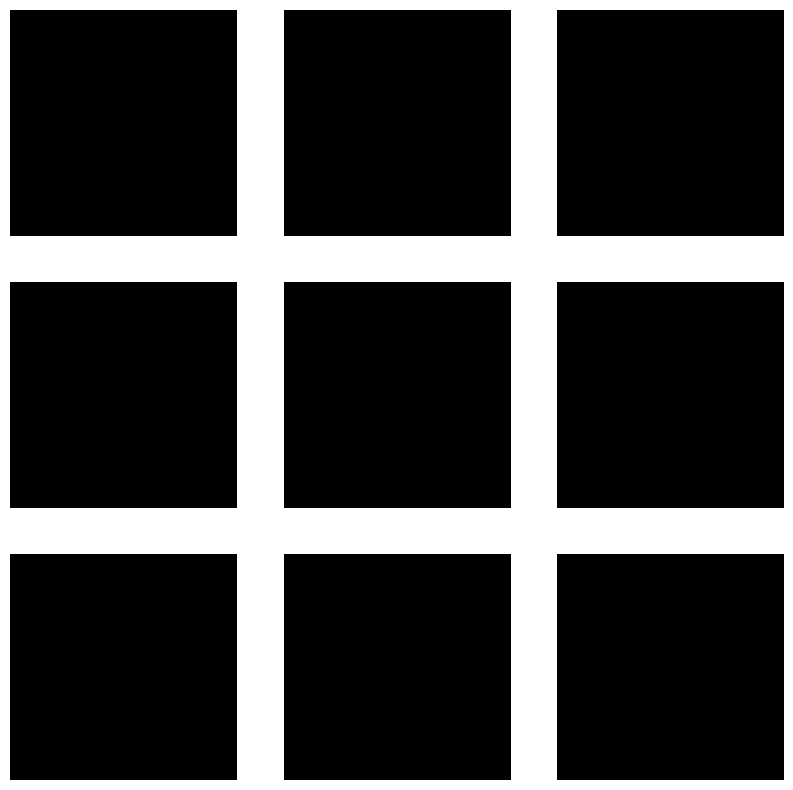

2026-02-18 20:49:26.991568: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         # plt.title(train_ds.class_names[labels[i]])
#         plt.axis("off")
#     plt.show()

In [5]:
normalization_layer = layers.Rescaling(1./255)

In [6]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [ ]:

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([


    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # prevents overfitting
    layers.Dense(1, activation='sigmoid')  # binary output
])

model.summary()


/Users/lait-zet/Desktop/pose-correction-ai/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=15
# )


Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.5111 - loss: 0.7221 - val_accuracy: 0.4993 - val_loss: 0.6926
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.5866 - loss: 0.6713 - val_accuracy: 0.7907 - val_loss: 0.5187
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.7496 - loss: 0.5087 - val_accuracy: 0.9138 - val_loss: 0.2982
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8049 - loss: 0.4133 - val_accuracy: 0.8755 - val_loss: 0.2908
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8510 - loss: 0.3451 - val_accuracy: 0.8482 - val_loss: 0.3577
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.8791 - loss: 0.2901 - val_accuracy: 0.9316 - val_loss: 0.1817
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8948 - loss: 0.2521 - val_accuracy: 0.9289 - val_loss: 0.1793
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9037 - loss: 0.2505 - val_accu

In [12]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)

115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9850 - loss: 0.0470
Test accuracy: 0.9849644899368286


In [13]:
model.save("pose_correction_model.h5")

In [32]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf

model = load_model("/Users/lait-zet/Desktop/pose-correction-ai/model/pose_correction_model.h5")


image_test = "/Users/lait-zet/Desktop/pose-correction-ai/Photo on 2-18-26 at 8.53 PM #3.jpg"

img = tf.keras.utils.load_img(image_test, target_size=(128, 128))
img_array = tf.keras.utils.img_to_array(img)


img_array = np.expand_dims(img_array, axis=0)


img_array = img_array / 255.0


prediction = model.predict(img_array)


probability = prediction[0][0]

print("Raw probability:", probability)

if probability > 0.5:
    print("Prediction: CORRECT ✅")
else:
    print("Prediction: INCORRECT ❌")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Raw probability: 0.07723646
Prediction: INCORRECT ❌
